# **Machine Learning Assigment_ GROUP_26**

**Discriminating between Real and Fake Images of Galaxies**


In [ ]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf

import cv2 as cv

from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

import keras.utils as image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization

from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the path to the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Galaxies_NN_Data/Group_Project_Data'

# Accessing the train and test data from the google drive
train_data_path = os.path.join(dataset_path, 'Train')
test_data_path = os.path.join(dataset_path, 'Valid')


# To Print the train data and test data
print(train_data_path)
print(test_data_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Galaxies_NN_Data/Group_Project_Data/Train
/content/drive/MyDrive/Colab Notebooks/Galaxies_NN_Data/Group_Project_Data/Valid




> Image Generators from Keras


Creating generators for train and test data using the ImageDataGenerator function from Keras.

In [ ]:
# Set the image size and batch size
IMG_SIZE = 64
BATCH_SIZE = 32

# Creating ImageDataGenerator instances for train and test sets
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# Load the train and test data using flow_from_directory method
train_data = train_datagen.flow_from_directory(directory = train_data_path,
                                               target_size = (IMG_SIZE, IMG_SIZE),
                                               batch_size = BATCH_SIZE,
                                               class_mode = 'binary',
                                               shuffle = True,
                                               seed = 42)

test_data = test_datagen.flow_from_directory(directory = test_data_path,
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             batch_size = BATCH_SIZE,
                                             class_mode = 'binary',
                                             shuffle = True,
                                             seed = 42)


Found 6000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


**Defining Neural Network Model Architecture and compiling it**

In [ ]:
# Build the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

# Compile the model
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 128)       



---



*   Data augmentation and normalization
*   *Generating the Training and Validation Data*
*   *Train the Model using fit function*

In [ ]:
# Set the batch size and number of epochs for training
batch_size = 32
epochs = 10

# Define the ImageDataGenerator for data augmentation and normalization
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.2
)

# Generate the training and validation data
train_generator = datagen.flow_from_directory(
    train_data_path,
    target_size = (64, 64),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'training'
)

validation_generator = datagen.flow_from_directory(
    train_data_path,
    target_size = (64, 64),
    batch_size = batch_size,
    class_mode = 'binary',
    subset = 'validation'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = epochs
)


Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Epoch 1/10
150/150 [==============================] - 20s 110ms/step - loss: 0.2396 - accuracy: 0.8848 - val_loss: 0.0594 - val_accuracy: 0.9831
Epoch 2/10
150/150 [==============================] - 16s 105ms/step - loss: 0.0298 - accuracy: 0.9917 - val_loss: 0.0043 - val_accuracy: 0.9975
Epoch 3/10
150/150 [==============================] - 16s 106ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 0.0113 - val_accuracy: 0.9941
Epoch 4/10
150/150 [==============================] - 16s 107ms/step - loss: 0.0312 - accuracy: 0.9883 - val_loss: 0.0183 - val_accuracy: 0.9924
Epoch 5/10
150/150 [==============================] - 16s 105ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 8.4828e-04 - val_accuracy: 1.0000
Epoch 6/10
150/150 [==============================] - 16s 104ms/step - loss: 0.0017 - accuracy: 0.9992 - val_loss: 0.0046 - val_accuracy: 0.9983
Epoch 7/10
150/150 [======================

In [ ]:
import os
from keras.models import load_model

# Define the path where the model will be saved
model_path = '/content/drive/MyDrive/Colab Notebooks/Galaxies_NN_Data/Group_Project_Models/galaxy_classifier_model.h5'

# Check if the directory exists, create it if it doesn't
if not os.path.exists(os.path.dirname(model_path)):
    os.makedirs(os.path.dirname(model_path))

# Save the trained model
try:
    model.save(model_path)
    print('Model saved to disk.')
except:
    print('Error: could not save model to disk.')
    
# Load the saved model
try:
    model = load_model(model_path)
    print('Model loaded successfully.')
except:
    print('Error: could not load model from disk.')


Model saved to disk.
Model loaded successfully.


Model loaded successfully.
63/63 [==============================] - 3s 52ms/step - loss: 0.0439 - accuracy: 0.9995
Test Loss: 0.04, Test Accuracy: 1.00


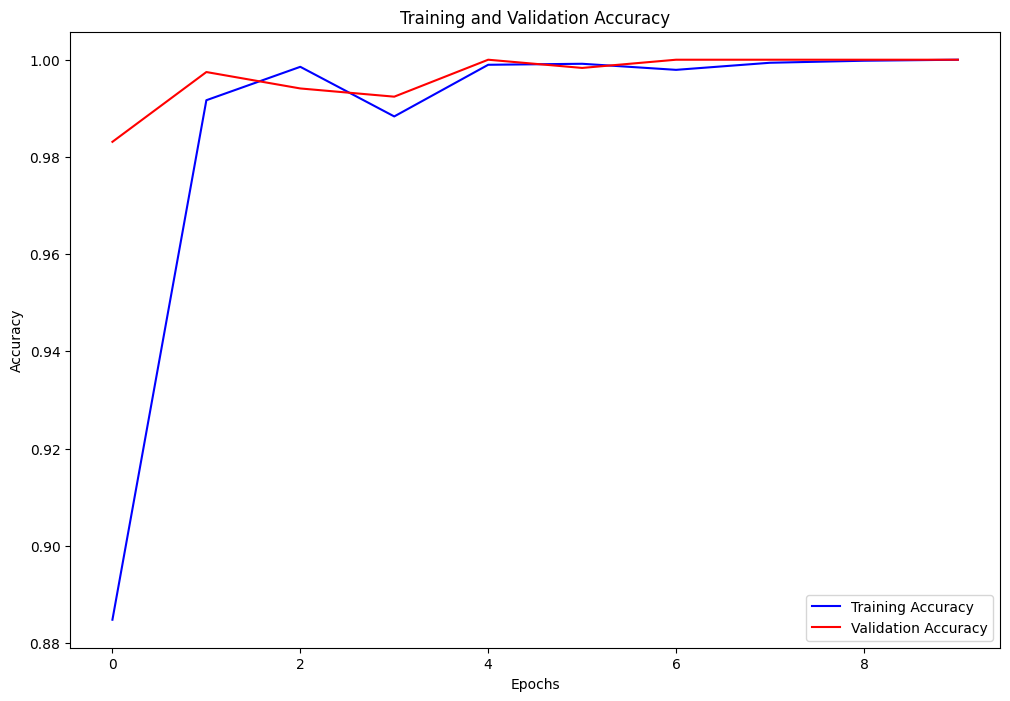

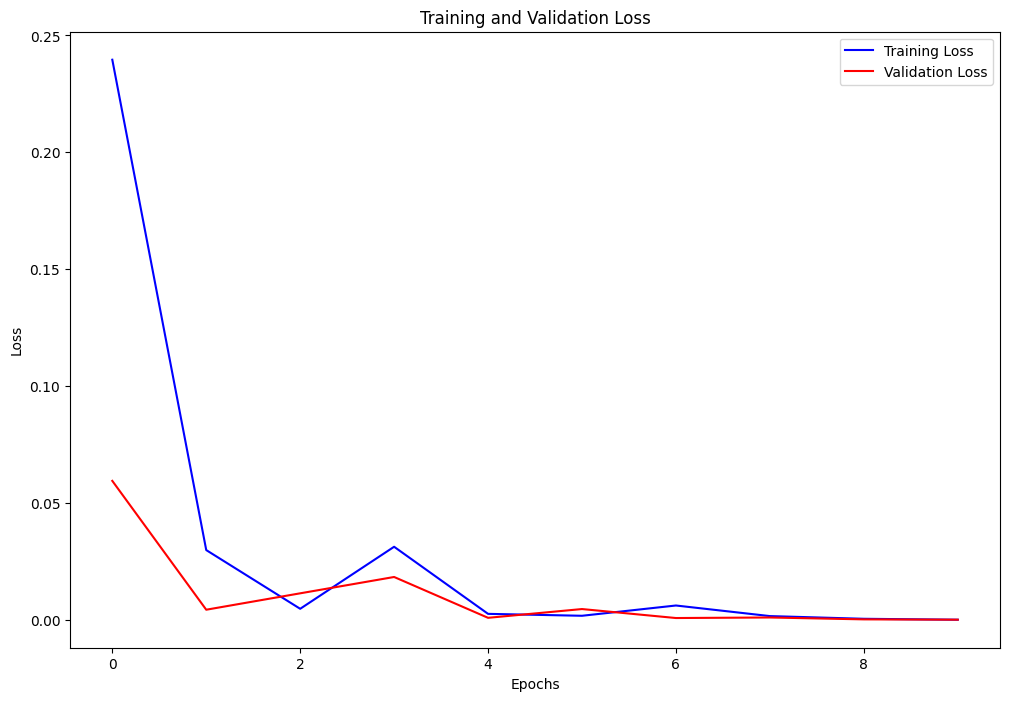

In [ ]:
# Define the path where the model is saved
model_path = '/content/drive/MyDrive/Colab Notebooks/Galaxies_NN_Data/Group_Project_Models/galaxy_classifier_model.h5'

# Load the saved model
try:
    model = load_model(model_path)
    print('Model loaded successfully.')
except:
    print('Error: could not load model from disk.')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Loss: {test_loss:.2f}, Test Accuracy: {test_acc:.2f}')

# Plot the accuracy and loss curves
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot the training and validation accuracy
plt.figure(figsize = (12, 8))
plt.plot(train_acc, label = 'Training Accuracy', color = 'blue')
plt.plot(val_acc, label = 'Validation Accuracy', color = 'red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Plot the training and validation loss
plt.figure(figsize = (12, 8))
plt.plot(train_loss, label = 'Training Loss', color = 'blue')
plt.plot(val_loss, label = 'Validation Loss', color = 'red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


In [ ]:
# Generate predictions on the test set
predictions = model.predict(test_data)

# Convert predictions to binary values (0 or 1)
binary_predictions = np.round(predictions)

# Print the first 10 binary predictions
print(binary_predictions[:20])


63/63 [==============================] - 3s 48ms/step
[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]]


1/1 [==============================] - 0s 21ms/step


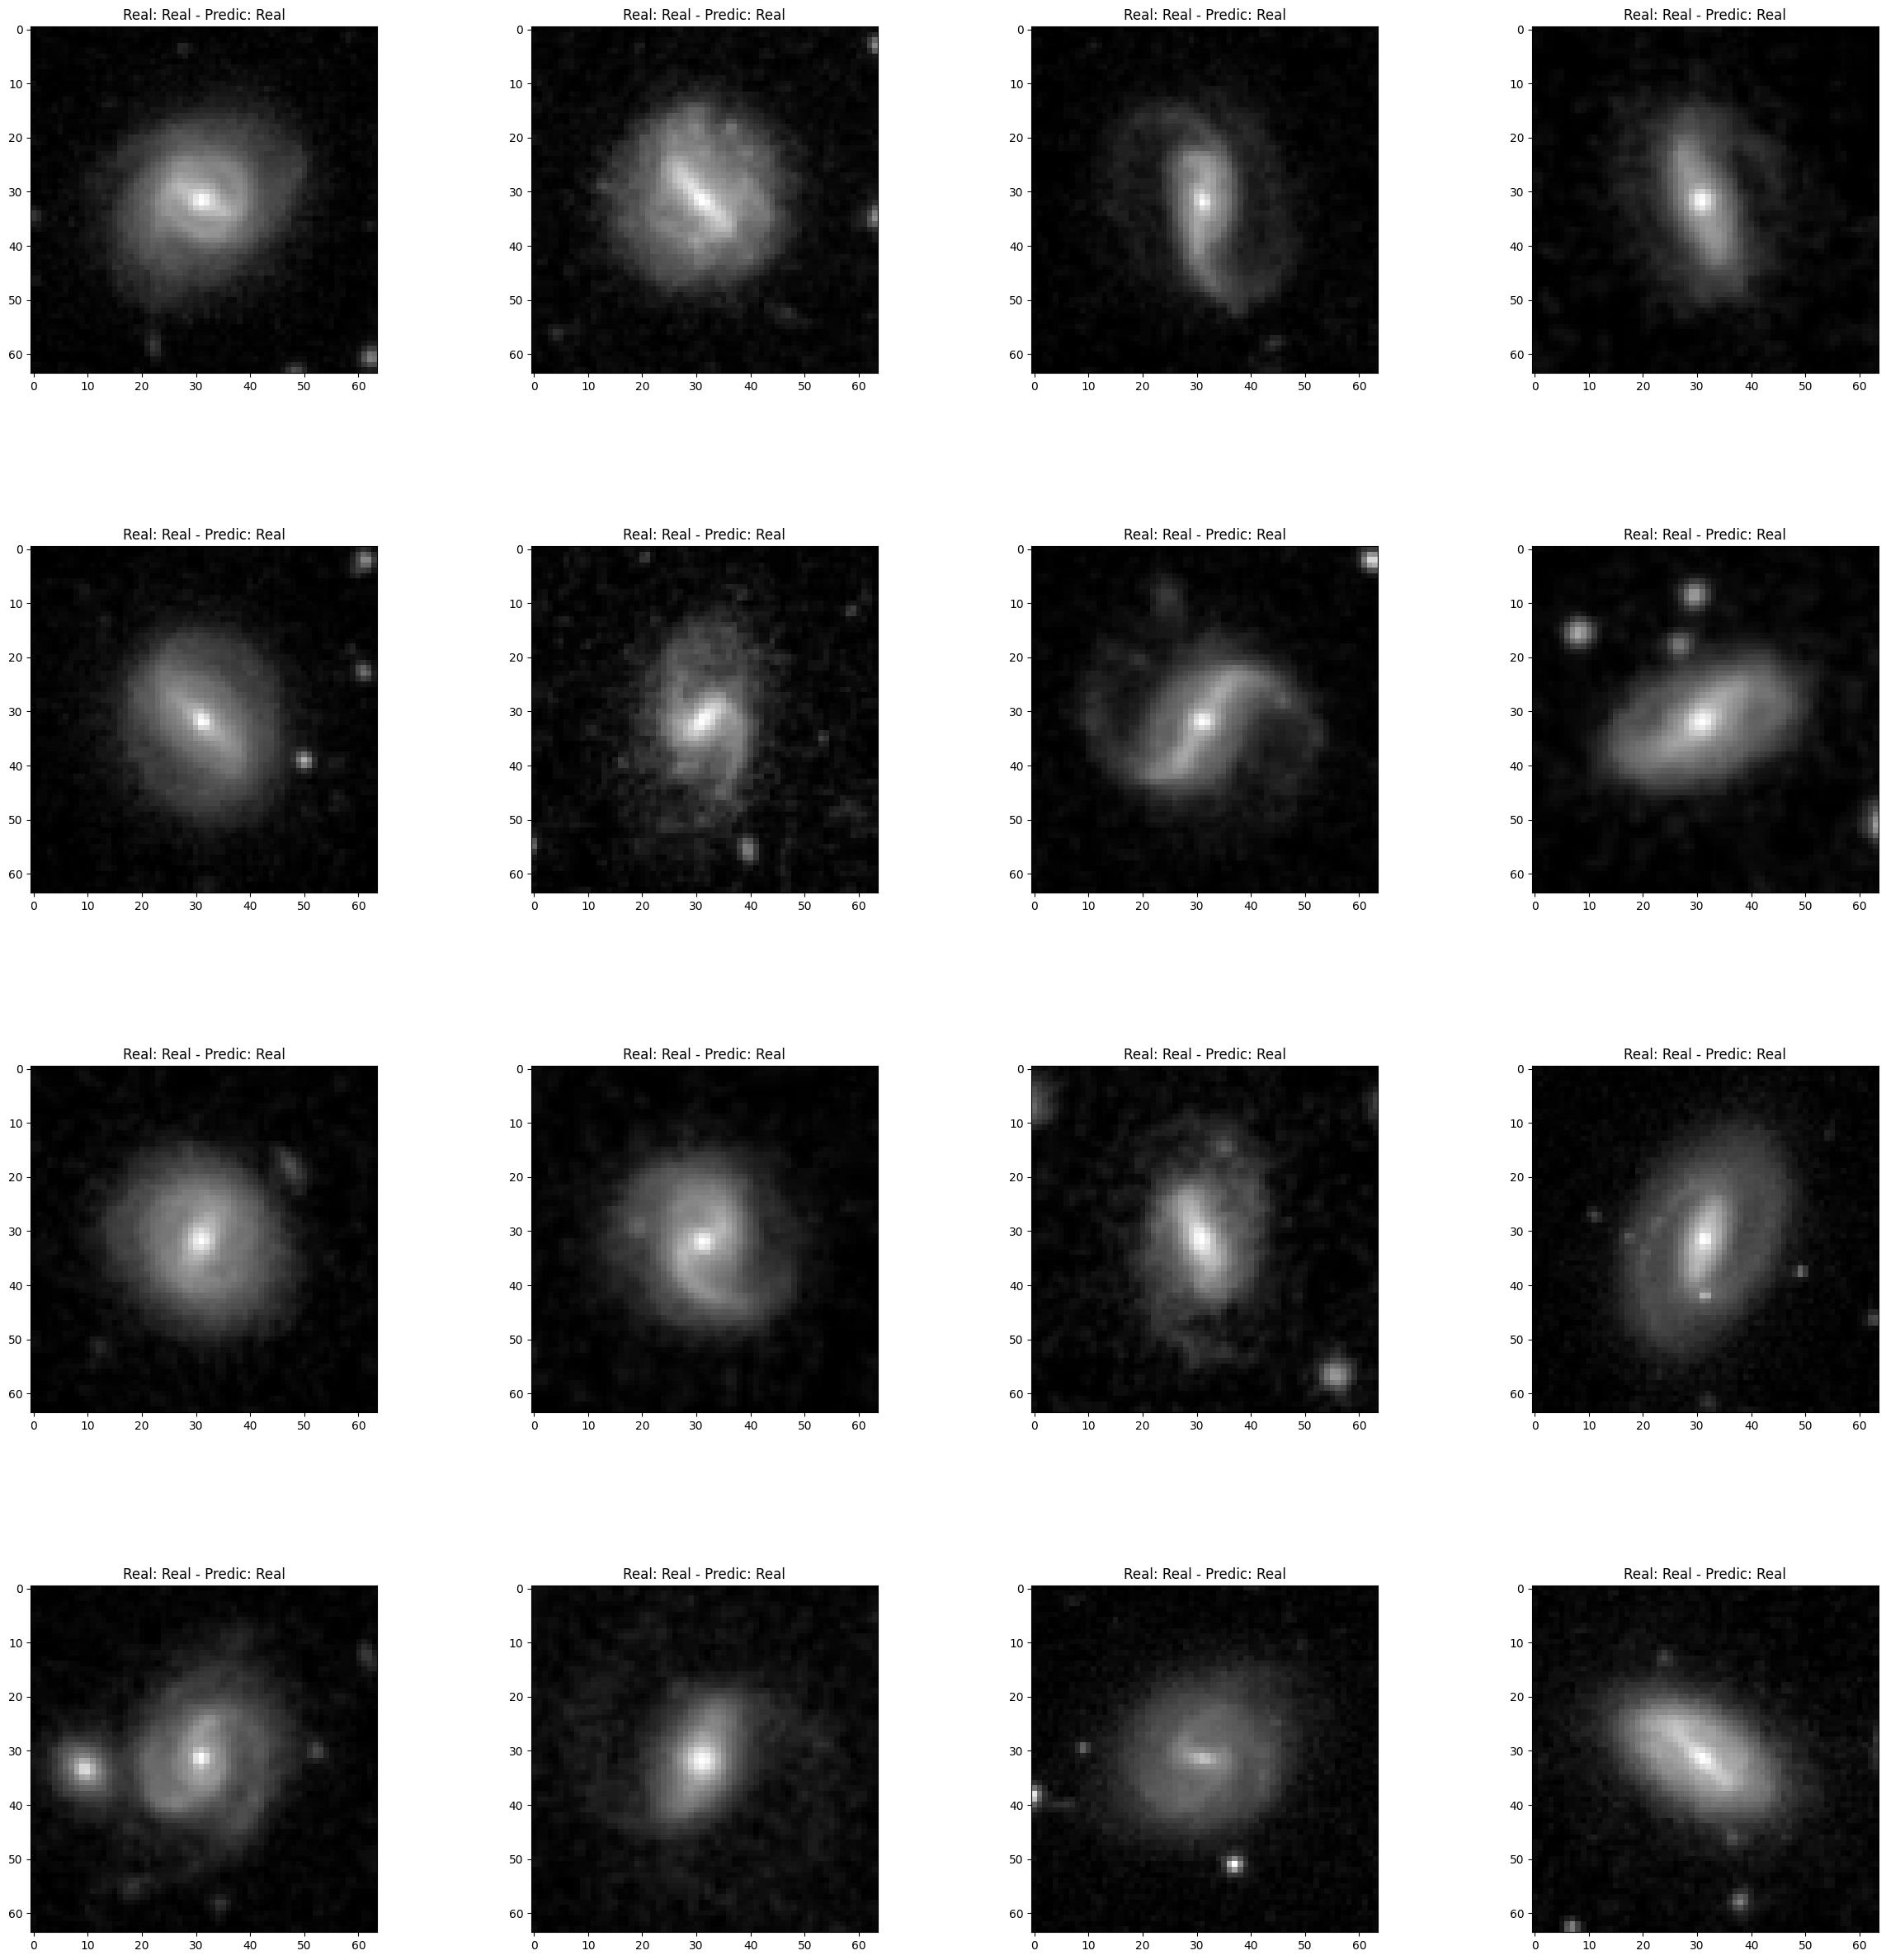

1/1 [==============================] - 0s 20ms/step


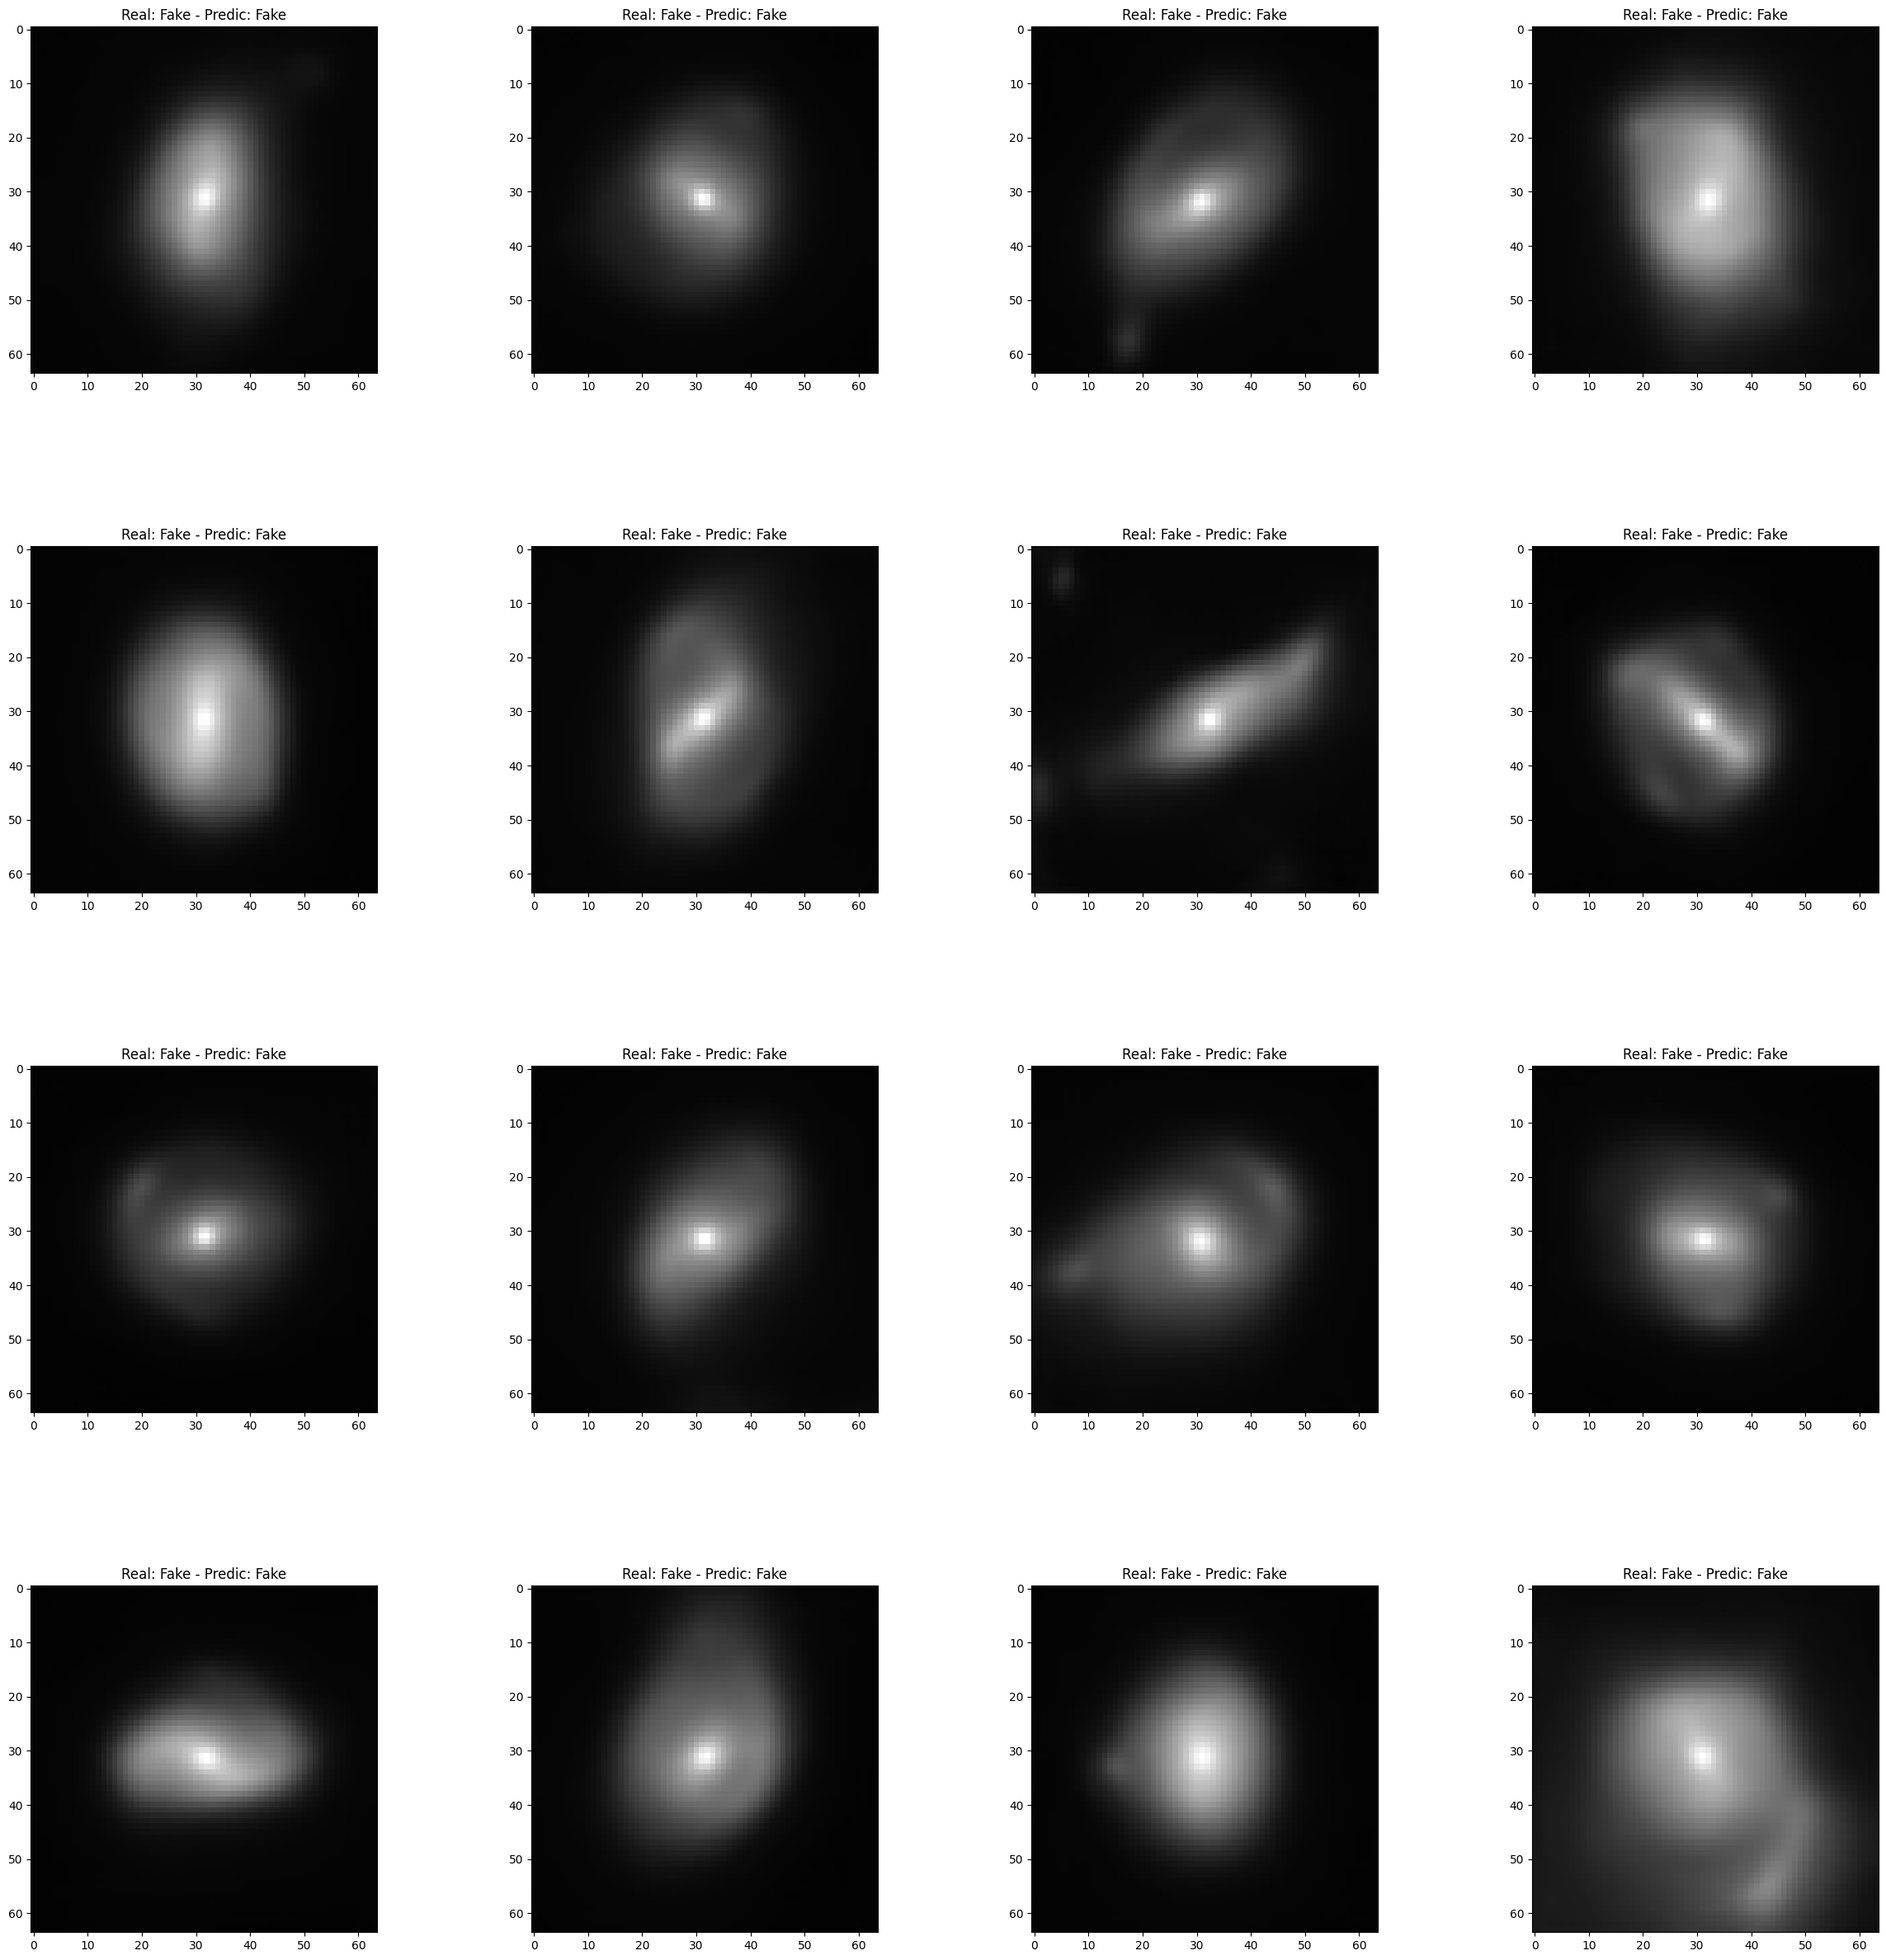

In [ ]:
# Defining the test model 
def test_model(path, model, int_type):
    # set the path and label based on the int_type argument
    if int_type == 0:
        _path = os.path.join(path, "Fake")
        label = "Fake"
    else:
        _path = os.path.join(path, "Real")
        label = "Real"

    # get a list of image names in the path
    lst_img_name = os.listdir(_path)

    # if there are less than 2 images in the path, return
    if len(lst_img_name) < 2:
        return

    # create a 4x4 subplot grid for displaying the images
    plt.figure(figsize = (30, 30))
    plt.subplots_adjust(top = None, bottom = None, left = None, right = None, wspace = 0.2, hspace = 0.5)

    # randomly select 16 images to display
    for i in range(1, 17):
        # get a random index from the list of image names
        th = np.random.randint(0, len(lst_img_name) - 1)

        # get the path to the image
        img_path = os.path.join(_path, lst_img_name[th])

        # load the image and resize it to 64x64
        image_test = tf.keras.preprocessing.image.load_img(img_path, target_size = (64, 64))

        # convert the image to a numpy array and expand the dimensions to match the model input shape
        image_test = tf.keras.preprocessing.image.img_to_array(image_test)
        image_test = np.expand_dims(image_test, axis = 0)

        # make a prediction using the model
        predict = model.predict(image_test)

        # display the image and prediction label
        img = cv.imread(img_path)
        plt.subplot(4, 4, i)
        plt.imshow(img)
        if predict[0][0] > 0.5:
            predict_label = "Predic: Real"
        else:
            predict_label = "Predic: Fake"
        plt.title("Real: " + label + " - " + predict_label)

    # show the plot
    plt.show()

# Calling function to produce the real images
test_model(test_data_path, model, 1)

# Calling function to produce the fake images
test_model(test_data_path, model, 0)
